Epoch: 0 Accuracy: 100.00%
Weight: [1514.173 2217.875], Bias: -1525268.75


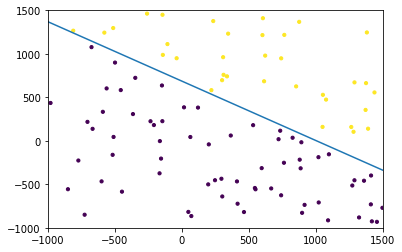

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 100
gen = generator.gen(batch_size)
epochs = 100
x1, x2, yp = [], [], []  # for plotting

class perceptron:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias  # For actual prediction, add tf.math.sign

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def acc(self, y, pred):
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        return positiveCount/signs.shape[0]*100

    def train(self, x, y, epoch_count):
        global x1, x2, yp
        for i in range(x.shape[0]):
            x1 += [x[i].numpy()[0]]
            x2 += [x[i].numpy()[1]]
            yp += [y[i]]
            pred = self(x)
            if (y[i] * pred[i]) <= 0:
                error = y[i] - pred[i]
                self.Weight.assign_add(x[i] * y[i])
                self.Bias.assign_add(y[i] + error)
        accuracy = self.acc(y, pred)
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}%')
        return accuracy

model = perceptron()
x, y = next(gen)
model.Weight.assign([0.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count)
    if acc == 100:
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-1000, 1500], [(-model.Weight[0]/model.Weight[1]) * -1000 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x1[:200], x2[:200], c=yp[:200], s=10)  # Plot some points only
plt.xlim([-1000, 1500])
plt.ylim([-1000, 1500])
plt.show()

Epoch: 0 Accuracy: 73.00% Loss: 97.93384552001953
Epoch: 1 Accuracy: 75.00% Loss: 85.6521224975586
Epoch: 2 Accuracy: 73.00% Loss: 75.57482147216797
Epoch: 3 Accuracy: 74.00% Loss: 67.5670394897461
Epoch: 4 Accuracy: 76.00% Loss: 60.06806182861328
Epoch: 5 Accuracy: 76.00% Loss: 55.408447265625
Epoch: 6 Accuracy: 76.00% Loss: 51.949806213378906
Epoch: 7 Accuracy: 77.00% Loss: 48.50786590576172
Epoch: 8 Accuracy: 77.00% Loss: 45.543209075927734
Epoch: 9 Accuracy: 77.00% Loss: 42.583641052246094
Epoch: 10 Accuracy: 77.00% Loss: 39.62919616699219
Epoch: 11 Accuracy: 78.00% Loss: 36.67991638183594
Epoch: 12 Accuracy: 78.00% Loss: 33.79133224487305
Epoch: 13 Accuracy: 78.00% Loss: 30.919050216674805
Epoch: 14 Accuracy: 78.00% Loss: 28.074880599975586
Epoch: 15 Accuracy: 78.00% Loss: 25.24298667907715
Epoch: 16 Accuracy: 78.00% Loss: 22.41576385498047
Epoch: 17 Accuracy: 79.00% Loss: 19.593021392822266
Epoch: 18 Accuracy: 79.00% Loss: 16.78566551208496
Epoch: 19 Accuracy: 79.00% Loss: 13.998

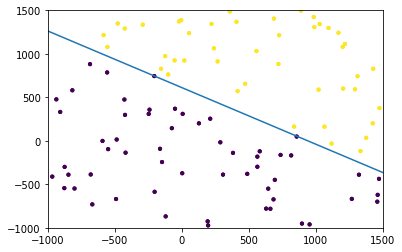

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import generator
import math

batch_size = 100
gen = generator.gen(batch_size)
epochs = 100
regTerm = 1e-2
lr = 1e-5
x1, x2, yp = [], [], []  # for plotting

class LinearClassifier:
    def __call__(self, x):  # predicting function
        return tf.reduce_sum(x * self.Weight, axis=-1) + self.Bias

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(0.0)

    def acc(self, y, pred):
        signs = tf.math.sign(y*pred)
        positiveCount = tf.where(signs > 0.0).shape[0]
        return positiveCount/signs.shape[0]*100

    def loss(self, y, pred):
        return tf.reduce_mean(tf.math.maximum(0, 1-y*pred) + regTerm * tf.norm(self.Weight, ord='euclidean'))  # tf.reduce_mean(max(0, 1-y*pred) + regTerm * tf.sqrt(self.Weight[0] ** 2 + self.Weight[1] ** 2) ** 2)

    def train(self, x, y, epoch_count, lr):
        global x1, x2, yp
        for i in range(0, x.shape[0]):
            x1 += [x[i].numpy()[0]]
            x2 += [x[i].numpy()[1]]
            yp += [y[i]]
            with tf.GradientTape(persistent=True) as t: # persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
                pred = self(x)
                current_loss = self.loss(y, pred)
            dy_dWeight, dy_dBias = t.gradient(current_loss, [self.Weight, self.Bias])
            error = y[i] - pred[i]
            self.Weight.assign_sub(lr * dy_dWeight)
            self.Bias.assign_sub(lr * (dy_dBias - error))
        accuracy = self.acc(y, pred)
        print(f'Epoch: {epoch_count} Accuracy: {accuracy:.2f}% Loss: {current_loss}')
        return accuracy

model = LinearClassifier()
x, y = next(gen)
model.Weight.assign([1.0] * x.shape[-1])
for epoch_count in range(epochs):
    acc = model.train(x, y, epoch_count, lr)
    if acc == 100:  # Early stopping
        break
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')

plt.plot([-1000, 1500], [(-model.Weight[0]/model.Weight[1]) * -1000 + (-model.Bias/model.Weight[1]), (-model.Weight[0]/model.Weight[1]) * 1500 + (-model.Bias/model.Weight[1])])
plt.scatter(x1[:200], x2[:200], c=yp[:200], s=10)  # Plot some points only
plt.xlim([-1000, 1500])
plt.ylim([-1000, 1500])
plt.show()